In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout,SimpleRNN, GRU, Activation
from tensorflow.keras.models import Sequential
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from cv2 import imread, resize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

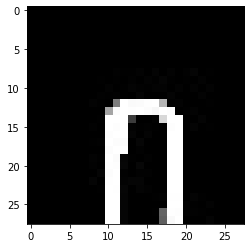

(28, 28, 3)

In [2]:
base_dir = '../input/mramr-dataset/MR-AMR Dataset'
image = mpimg.imread('../input/mramr-dataset/MR-AMR Dataset/0/10C 32860.jpg')
plt.imshow(image)
plt.show()
image.shape

In [3]:
IMAGE_SIZE=28
BATCH_SIZE=500

In [4]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     validation_split=0.2,
     fill_mode='nearest'
    )

In [5]:
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     validation_split=0.2,
     fill_mode='nearest'
)

In [6]:
train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True,
    class_mode='categorical',
    seed=42
)

Found 112004 images belonging to 10 classes.


In [7]:
test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 27996 images belonging to 10 classes.


In [8]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
# model.add(tf.keras.layers.MaxPool2D(2,2))
# model.add(Dropout(0.1))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(Dropout(0.1))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.1))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(Dropout(0.2))
# model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(2,2))
# model.add(Dropout(0.2))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(Dropout(0.2))
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.1))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

2022-12-13 00:52:33.960453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 00:52:33.961418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 00:52:34.250270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 00:52:34.251182: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 00:52:34.251946: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [9]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5,min_delta=0.001,restore_best_weights=True)

In [10]:
optimizer = Adam(learning_rate=0.001)

In [11]:
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [12]:
# STEP_SIZE_TRAIN = train_datagen.n//train_datagen.batch_size
# STEP_SIZE_VALID = test_datagen.n//test_datagen.batch_size

In [13]:
history = model.fit(train_datagen,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=155,
                    validation_data=test_datagen,
#                     validation_steps=STEP_SIZE_VALID,
                    callbacks=[reduce_lr])

2022-12-13 00:52:42.970151: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/155


2022-12-13 00:52:48.269267: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


225/225 [==============================] - 867s 4s/step - loss: 1.5643 - accuracy: 0.4584 - val_loss: 1.3796 - val_accuracy: 0.5400
Epoch 2/155
225/225 [==============================] - 256s 1s/step - loss: 0.9009 - accuracy: 0.6978 - val_loss: 1.0007 - val_accuracy: 0.6543
Epoch 3/155
225/225 [==============================] - 261s 1s/step - loss: 0.6898 - accuracy: 0.7669 - val_loss: 0.8184 - val_accuracy: 0.7142
Epoch 4/155
225/225 [==============================] - 250s 1s/step - loss: 0.5825 - accuracy: 0.8012 - val_loss: 0.7177 - val_accuracy: 0.7567
Epoch 5/155
225/225 [==============================] - 250s 1s/step - loss: 0.5214 - accuracy: 0.8225 - val_loss: 0.7142 - val_accuracy: 0.7429
Epoch 6/155
225/225 [==============================] - 250s 1s/step - loss: 0.4757 - accuracy: 0.8392 - val_loss: 0.6260 - val_accuracy: 0.7774
Epoch 7/155
225/225 [==============================] - 249s 1s/step - loss: 0.4242 - accuracy: 0.8563 - val_loss: 0.5909 - val_accuracy: 0.7926
Epoc

In [14]:
model_loss = pd.DataFrame(model.history.history)

Text(0, 0.5, 'accuracy')

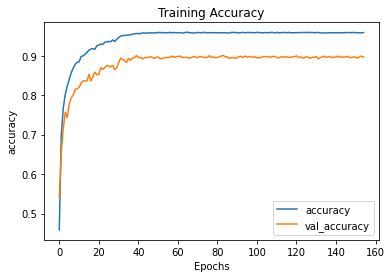

In [15]:
pd.DataFrame(history.history)
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

In [16]:
from tensorflow.keras.models import save_model
save_model(model, "model.h5")